In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotnine as p9
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

# 1 6 region

In [2]:
expr = pd.read_csv("../res/0.preprocessing/sample_expr.tsv", sep="\t", index_col=0)
info = pd.read_csv("../res/0.preprocessing/sample_info.tsv", sep="\t", index_col=0)

In [3]:
expr_scale = preprocessing.scale(expr.T, axis=0)
pca_obj = PCA(n_components=3, svd_solver="full")
components = pca_obj.fit_transform(expr_scale)

tmp = []
for i in ["Batch", "Region", "Hemi"]:
    pca_dat = pd.DataFrame(components[:, :2], columns=['PC1', 'PC2'])
    pca_dat["Labels"] = expr.columns
    pca_dat["Group"] = info.loc[pca_dat["Labels"], i].values
    pca_dat["Type"] = i
    tmp.append(pca_dat.copy())
pca_dat = pd.concat(tmp)

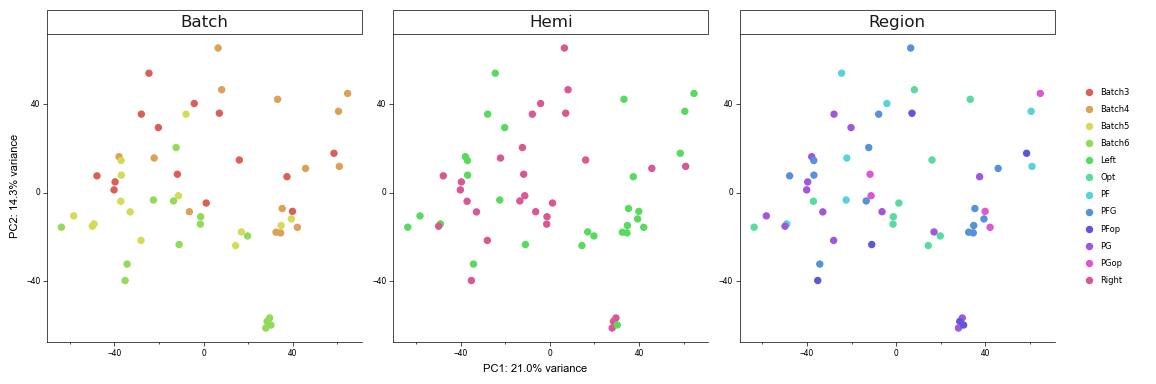

<ggplot: (8761244981929)>

In [4]:
pca_plot = ( p9.ggplot(p9.aes(x="PC1", y="PC2", color="Group"), pca_dat)
    + p9.geom_point(size=2)
    + p9.xlab(f"PC1: {pca_obj.explained_variance_ratio_[0]:.1%} variance")
    + p9.ylab(f"PC2: {pca_obj.explained_variance_ratio_[1]:.1%} variance")
    + p9.theme_classic()
    + p9.theme(figure_size=(13, 4),
                axis_text = p9.element_text(color="black", size=6, family="Arial"),
                #axis_text_x = p9.element_text(angle=90),
                axis_title=p9.element_text(color="black", size=8, family="Arial"),
                #axis_title_x = p9.element_blank(),
                axis_line = p9.element_line(size=0.5),
                axis_ticks = p9.element_line(color="black", size=0.5),
                axis_ticks_minor_y=p9.element_blank(),
                        
                legend_title=p9.element_blank(),
                legend_text=p9.element_text(color="black", size=6),
                legend_key_size=10,
                legend_background=p9.element_blank(),
                legend_direction="vertical",
                legend_position="right",
                strip_background=p9.element_rect(size=0.5),
                strip_text=p9.element_text(size=12),
                subplots_adjust={"wspace":0.1})
             + p9.guides(fill=p9.guide_legend(ncol=2, byrow=False))
             + p9.facet_wrap("~Type", nrow=1, ncol=3, scales="free")
)
p9.ggsave(pca_plot, "../res/1.qc/PCA_6region.pdf", units="in", width=13, height=4, verbose=False)
pca_plot

In [5]:
## 2.3 tSNE
tsne_obj = TSNE(n_components=2, perplexity=30, init="random", learning_rate="auto", method='exact',
                metric='correlation', n_iter=10000, early_exaggeration=50)
tsne_obj.fit(expr_scale)

tmp = []
for i in ["Batch", "Region", "Hemi"]:
    tsne_dat = pd.DataFrame(tsne_obj.embedding_, columns=['tSNE1', 'tSNE2'])
    tsne_dat["Labels"] = expr.columns
    tsne_dat["Group"] = info.loc[tsne_dat["Labels"], i].values
    tsne_dat["Type"] = i
    tmp.append(tsne_dat.copy())
tsne_dat = pd.concat(tmp)

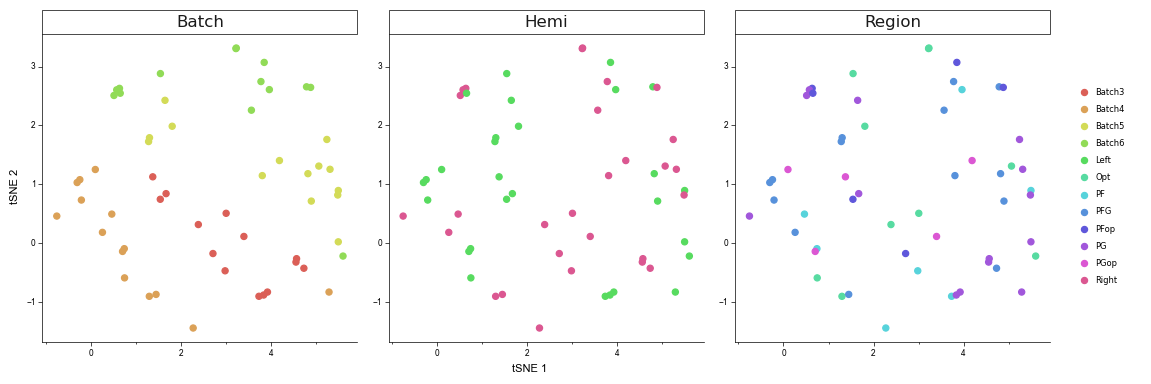

<ggplot: (8761167345658)>

In [6]:
tsne_plot = ( p9.ggplot(p9.aes(x="tSNE1", y="tSNE2", color="Group"), tsne_dat)
    + p9.geom_point(size=2)
    + p9.xlab(f"tSNE 1")
    + p9.ylab(f"tSNE 2")
    + p9.theme_classic()
    + p9.theme(figure_size=(13, 4),
                axis_text = p9.element_text(color="black", size=6, family="Arial"),
                #axis_text_x = p9.element_text(angle=90),
                axis_title=p9.element_text(color="black", size=8, family="Arial"),
                #axis_title_x = p9.element_blank(),
                axis_line = p9.element_line(size=0.5),
                axis_ticks = p9.element_line(color="black", size=0.5),
                axis_ticks_minor_y=p9.element_blank(),
                        
                legend_title=p9.element_blank(),
                legend_text=p9.element_text(color="black", size=6),
                legend_key_size=10,
                legend_background=p9.element_blank(),
                legend_direction="vertical",
                legend_position="right",
                strip_background=p9.element_rect(size=0.5),
                strip_text=p9.element_text(size=12),
                subplots_adjust={"wspace":0.1})
             + p9.guides(fill=p9.guide_legend(ncol=2, byrow=False))
             + p9.facet_wrap("~Type", nrow=1, ncol=3, scales="free")
)
p9.ggsave(tsne_plot, "../res/1.qc/tSNE_6region.pdf", units="in", width=13, height=4, verbose=False)
tsne_plot

In [16]:
umap_obj = umap.UMAP(n_neighbors=20, n_jobs=4, metric="correlation", learning_rate=0.1,
                     init="random", local_connectivity=5)
umap_obj.fit(expr_scale)

tmp = []
for i in ["Batch", "Region", "Hemi"]:
    umap_dat = pd.DataFrame(umap_obj.embedding_, columns=['UMAP1', 'UMAP2'])
    umap_dat["Labels"] = expr.columns
    umap_dat["Group"] = info.loc[umap_dat["Labels"], i].values
    umap_dat["Type"] = i
    tmp.append(umap_dat.copy())
umap_dat = pd.concat(tmp)
umap_dat.shape

(135, 5)

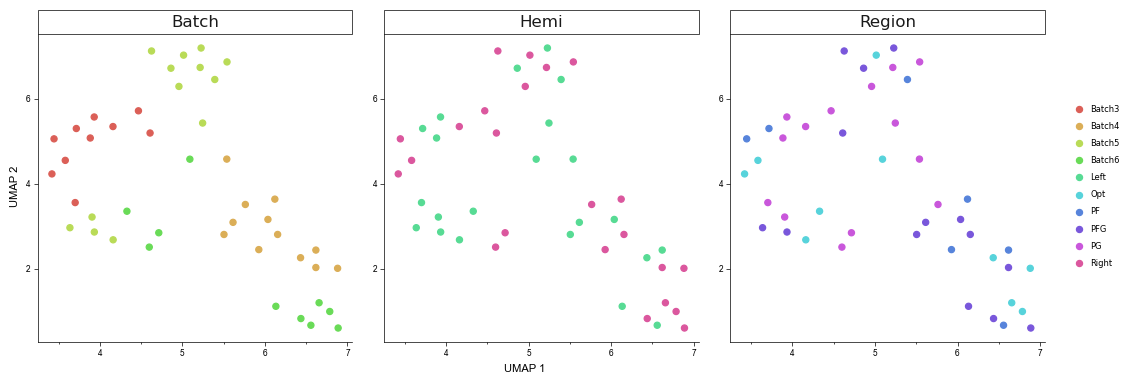

<ggplot: (8761119463955)>

In [17]:
umap_plot = ( p9.ggplot(p9.aes(x="UMAP1", y="UMAP2", color="Group"), umap_dat)
    + p9.geom_point(size=2)
    + p9.xlab(f"UMAP 1")
    + p9.ylab(f"UMAP 2")
    + p9.theme_classic()
    + p9.theme(figure_size=(13, 4),
                axis_text = p9.element_text(color="black", size=6, family="Arial"),
                #axis_text_x = p9.element_text(angle=90),
                axis_title=p9.element_text(color="black", size=8, family="Arial"),
                #axis_title_x = p9.element_blank(),
                axis_line = p9.element_line(size=0.5),
                axis_ticks = p9.element_line(color="black", size=0.5),
                axis_ticks_minor_y=p9.element_blank(),
                        
                legend_title=p9.element_blank(),
                legend_text=p9.element_text(color="black", size=6),
                legend_key_size=10,
                legend_background=p9.element_blank(),
                legend_direction="vertical",
                legend_position="right",
                strip_background=p9.element_rect(size=0.5),
                strip_text=p9.element_text(size=12),
                subplots_adjust={"wspace":0.1})
             + p9.guides(fill=p9.guide_legend(ncol=2, byrow=False))
             + p9.facet_wrap("~Type", nrow=1, ncol=3, scales="free")
)
p9.ggsave(tsne_plot, "../res/1.qc/UMAP_6region.pdf", units="in", width=13, height=4, verbose=False)
umap_plot

# 2 4 region

In [9]:
expr = pd.read_csv("../res/0.preprocessing/sample_expr.tsv", sep="\t", index_col=0)
info = pd.read_csv("../res/0.preprocessing/sample_info.tsv", sep="\t", index_col=0)

select_idx = info["Region"].isin(["PF", "PFG", "PG", "Opt"])
expr = expr.loc[:, select_idx]
info = info.loc[select_idx, :]

In [10]:
expr_scale = preprocessing.scale(expr.T, axis=0)
pca_obj = PCA(n_components=3, svd_solver="full")
components = pca_obj.fit_transform(expr_scale)

tmp = []
for i in ["Batch", "Region", "Hemi"]:
    pca_dat = pd.DataFrame(components[:, :2], columns=['PC1', 'PC2'])
    pca_dat["Labels"] = expr.columns
    pca_dat["Group"] = info.loc[pca_dat["Labels"], i].values
    pca_dat["Type"] = i
    tmp.append(pca_dat.copy())
pca_dat = pd.concat(tmp)

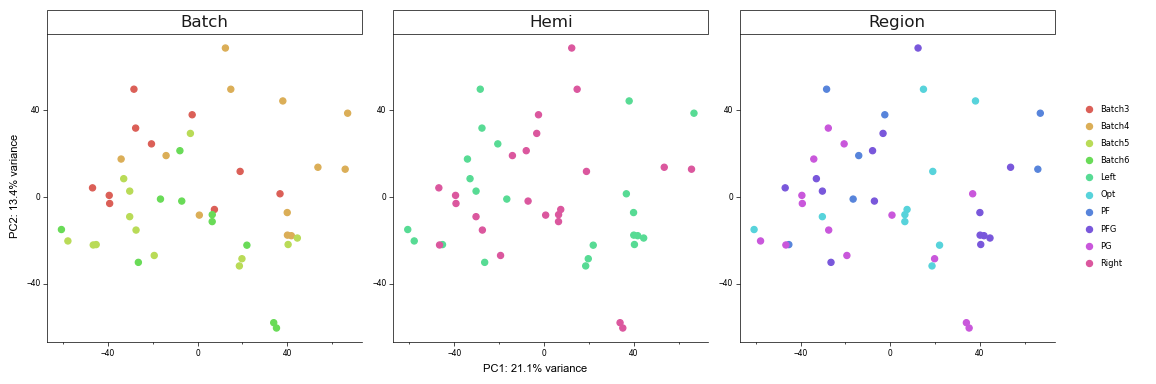

<ggplot: (8761171053319)>

In [11]:
pca_plot = ( p9.ggplot(p9.aes(x="PC1", y="PC2", color="Group"), pca_dat)
    + p9.geom_point(size=2)
    + p9.xlab(f"PC1: {pca_obj.explained_variance_ratio_[0]:.1%} variance")
    + p9.ylab(f"PC2: {pca_obj.explained_variance_ratio_[1]:.1%} variance")
    + p9.theme_classic()
    + p9.theme(figure_size=(13, 4),
                axis_text = p9.element_text(color="black", size=6, family="Arial"),
                #axis_text_x = p9.element_text(angle=90),
                axis_title=p9.element_text(color="black", size=8, family="Arial"),
                #axis_title_x = p9.element_blank(),
                axis_line = p9.element_line(size=0.5),
                axis_ticks = p9.element_line(color="black", size=0.5),
                axis_ticks_minor_y=p9.element_blank(),
                        
                legend_title=p9.element_blank(),
                legend_text=p9.element_text(color="black", size=6),
                legend_key_size=10,
                legend_background=p9.element_blank(),
                legend_direction="vertical",
                legend_position="right",
                strip_background=p9.element_rect(size=0.5),
                strip_text=p9.element_text(size=12),
                subplots_adjust={"wspace":0.1})
             + p9.guides(fill=p9.guide_legend(ncol=2, byrow=False))
             + p9.facet_wrap("~Type", nrow=1, ncol=3, scales="free")
)
p9.ggsave(pca_plot, "../res/1.qc/PCA_4region.pdf", units="in", width=13, height=4, verbose=False)
pca_plot

In [12]:
## 2.3 tSNE
tsne_obj = TSNE(n_components=2, perplexity=30, init="random", learning_rate="auto", method='exact',
                metric='correlation', n_iter=2000)
tsne_obj.fit(expr_scale)

tmp = []
for i in ["Batch", "Region", "Hemi"]:
    tsne_dat = pd.DataFrame(tsne_obj.embedding_, columns=['tSNE1', 'tSNE2'])
    tsne_dat["Labels"] = expr.columns
    tsne_dat["Group"] = info.loc[tsne_dat["Labels"], i].values
    tsne_dat["Type"] = i
    tmp.append(tsne_dat.copy())
tsne_dat = pd.concat(tmp)

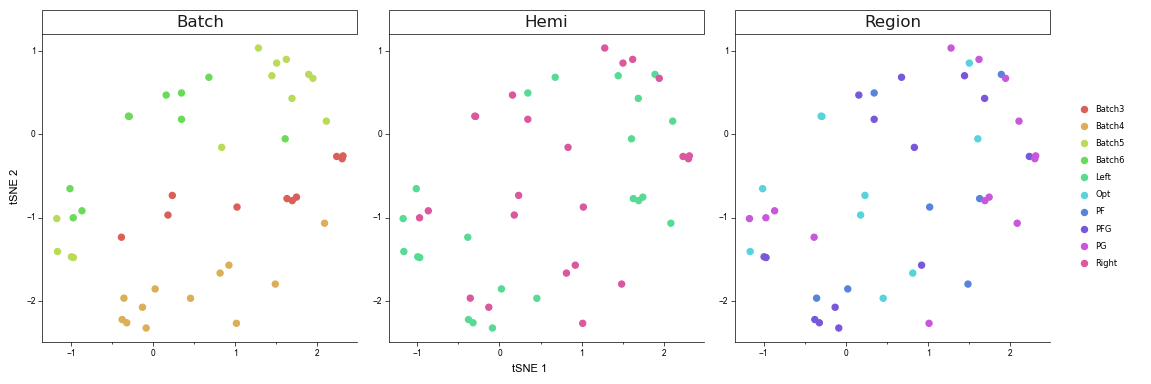

<ggplot: (8761171019789)>

In [13]:
tsne_plot = ( p9.ggplot(p9.aes(x="tSNE1", y="tSNE2", color="Group"), tsne_dat)
    + p9.geom_point(size=2)
    + p9.xlab(f"tSNE 1")
    + p9.ylab(f"tSNE 2")
    + p9.theme_classic()
    + p9.theme(figure_size=(13, 4),
                axis_text = p9.element_text(color="black", size=6, family="Arial"),
                #axis_text_x = p9.element_text(angle=90),
                axis_title=p9.element_text(color="black", size=8, family="Arial"),
                #axis_title_x = p9.element_blank(),
                axis_line = p9.element_line(size=0.5),
                axis_ticks = p9.element_line(color="black", size=0.5),
                axis_ticks_minor_y=p9.element_blank(),
                        
                legend_title=p9.element_blank(),
                legend_text=p9.element_text(color="black", size=6),
                legend_key_size=10,
                legend_background=p9.element_blank(),
                legend_direction="vertical",
                legend_position="right",
                strip_background=p9.element_rect(size=0.5),
                strip_text=p9.element_text(size=12),
                subplots_adjust={"wspace":0.1})
             + p9.guides(fill=p9.guide_legend(ncol=2, byrow=False))
             + p9.facet_wrap("~Type", nrow=1, ncol=3, scales="free")
)
p9.ggsave(tsne_plot, "../res/1.qc/tSNE_4region.pdf", units="in", width=13, height=4, verbose=False)
tsne_plot

In [14]:
umap_obj = umap.UMAP(n_neighbors=20, n_jobs=4, metric="correlation", learning_rate=0.02,
                     init="random", local_connectivity=5)
umap_obj.fit(expr_scale)

tmp = []
for i in ["Batch", "Region", "Hemi"]:
    umap_dat = pd.DataFrame(umap_obj.embedding_, columns=['UMAP1', 'UMAP2'])
    umap_dat["Labels"] = expr.columns
    umap_dat["Group"] = info.loc[umap_dat["Labels"], i].values
    umap_dat["Type"] = i
    tmp.append(umap_dat.copy())
umap_dat = pd.concat(tmp)
umap_dat.shape

(135, 5)

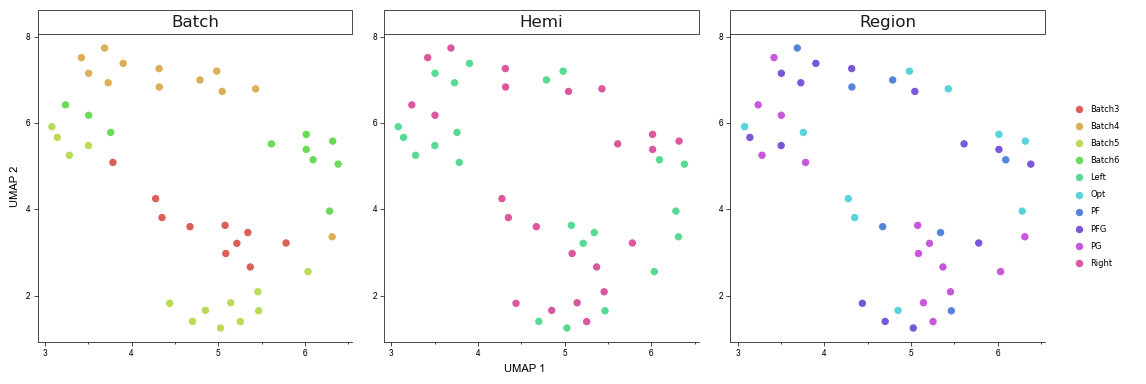

<ggplot: (8761171074341)>

In [15]:
umap_plot = ( p9.ggplot(p9.aes(x="UMAP1", y="UMAP2", color="Group"), umap_dat)
    + p9.geom_point(size=2)
    + p9.xlab(f"UMAP 1")
    + p9.ylab(f"UMAP 2")
    + p9.theme_classic()
    + p9.theme(figure_size=(13, 4),
                axis_text = p9.element_text(color="black", size=6, family="Arial"),
                #axis_text_x = p9.element_text(angle=90),
                axis_title=p9.element_text(color="black", size=8, family="Arial"),
                #axis_title_x = p9.element_blank(),
                axis_line = p9.element_line(size=0.5),
                axis_ticks = p9.element_line(color="black", size=0.5),
                axis_ticks_minor_y=p9.element_blank(),
                        
                legend_title=p9.element_blank(),
                legend_text=p9.element_text(color="black", size=6),
                legend_key_size=10,
                legend_background=p9.element_blank(),
                legend_direction="vertical",
                legend_position="right",
                strip_background=p9.element_rect(size=0.5),
                strip_text=p9.element_text(size=12),
                subplots_adjust={"wspace":0.1})
             + p9.guides(fill=p9.guide_legend(ncol=2, byrow=False))
             + p9.facet_wrap("~Type", nrow=1, ncol=3, scales="free")
)
p9.ggsave(tsne_plot, "../res/1.qc/UMAP_4region.pdf", units="in", width=13, height=4, verbose=False)
umap_plot